# 결측치 처리

## plant1 결측치 처리

In [320]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [321]:
plant1 = pd.read_csv("data/plant1_train.csv", encoding="utf-8")

In [322]:
plant1 = plant1.iloc[:,1:].copy()

In [323]:
plant1

,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
0,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0
1,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0
2,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0
3,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0
4,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,2019-03-31 23:10,10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0
58745,2019-03-31 23:20,10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0
58746,2019-03-31 23:30,10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0
58747,2019-03-31 23:40,10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0


In [324]:
plant1.isnull().sum()

plant1_train.mea_ddhr           0
plant1_train.tem_in_loc1      870
plant1_train.hum_in_loc1      870
plant1_train.tem_coil_loc1    870
plant1_train.tem_in_loc2      120
plant1_train.hum_in_loc2      120
plant1_train.tem_coil_loc2    120
plant1_train.tem_in_loc3      145
plant1_train.hum_in_loc3      145
plant1_train.tem_coil_loc3    120
plant1_train.tem_out_loc1     120
plant1_train.hum_out_loc1     120
plant1_train.cond_loc1        870
plant1_train.cond_loc2        120
plant1_train.cond_loc3        145
dtype: int64

In [325]:
plant1.columns = plant1.columns.str.replace("plant1_train.", "")

In [326]:
plant1.columns = plant1.columns.str.upper()

In [327]:
plant1

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
0,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0
1,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0
2,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0
3,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0
4,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,2019-03-31 23:10,10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0
58745,2019-03-31 23:20,10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0
58746,2019-03-31 23:30,10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0
58747,2019-03-31 23:40,10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0


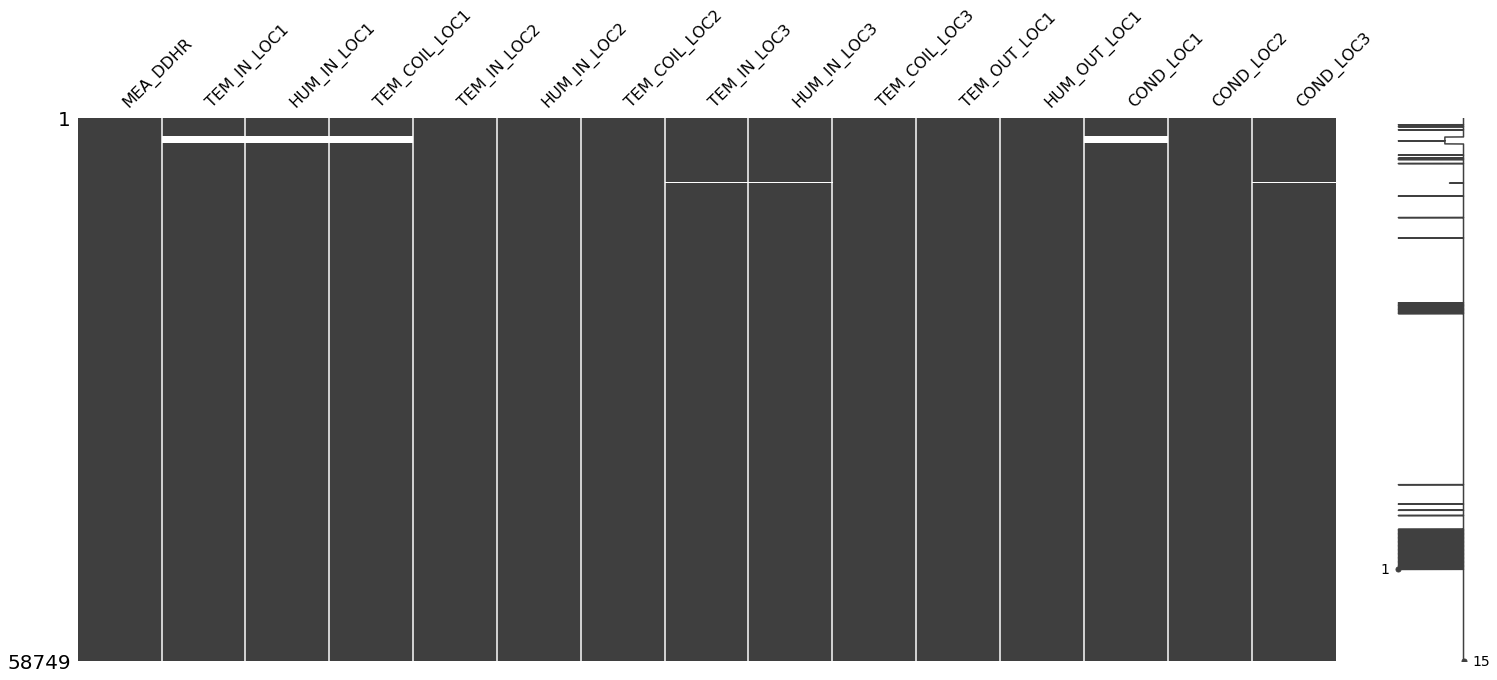

In [328]:
missingno.matrix(plant1)
plt.show()

In [329]:
plant1.head()

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
0,2016-04-01 0:00,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0.0,0.0,0.0
1,2016-04-01 3:00,14.0,28.0,10.0,12.0,32.0,9.0,11.0,42.0,7.0,7.0,59.0,0.0,0.0,0.0
2,2016-04-01 6:00,13.0,33.0,10.0,11.0,37.0,9.0,10.0,44.0,7.0,6.0,56.0,0.0,0.0,0.0
3,2016-04-01 9:00,13.0,33.0,10.0,11.0,35.0,9.0,10.0,41.0,8.0,18.0,30.0,0.0,0.0,0.0
4,2016-04-01 12:00,16.0,28.0,10.0,15.0,27.0,11.0,14.0,30.0,9.0,18.0,20.0,0.0,0.0,0.0


In [330]:
plant1_null = plant1.copy()

### nan값 선형값으로 결측치 보간

In [331]:
plant1_null = plant1_null.interpolate(method="linear")

In [332]:
plant1.loc[976:980]

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
976,2016-08-01 0:00,31.21,67.40,31.24,29.81,73.08,29.90,29.02,75.98,29.18,26.03,86.32,0.0,0.0,0.0
977,2016-08-01 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,2016-08-01 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,2016-08-01 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,2016-08-01 12:00,30.67,68.25,30.70,29.87,71.79,29.37,28.89,75.37,29.02,28.53,73.78,0.0,0.0,0.0


In [333]:
plant1_null.loc[976:980]

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
976,2016-08-01 0:00,31.210,67.4000,31.240,29.810,73.0800,29.9000,29.0200,75.9800,29.18,26.030,86.320,0.0,0.0,0.0
977,2016-08-01 3:00,31.075,67.6125,31.105,29.825,72.7575,29.7675,28.9875,75.8275,29.14,26.655,83.185,0.0,0.0,0.0
978,2016-08-01 6:00,30.940,67.8250,30.970,29.840,72.4350,29.6350,28.9550,75.6750,29.10,27.280,80.050,0.0,0.0,0.0
979,2016-08-01 9:00,30.805,68.0375,30.835,29.855,72.1125,29.5025,28.9225,75.5225,29.06,27.905,76.915,0.0,0.0,0.0
980,2016-08-01 12:00,30.670,68.2500,30.700,29.870,71.7900,29.3700,28.8900,75.3700,29.02,28.530,73.780,0.0,0.0,0.0


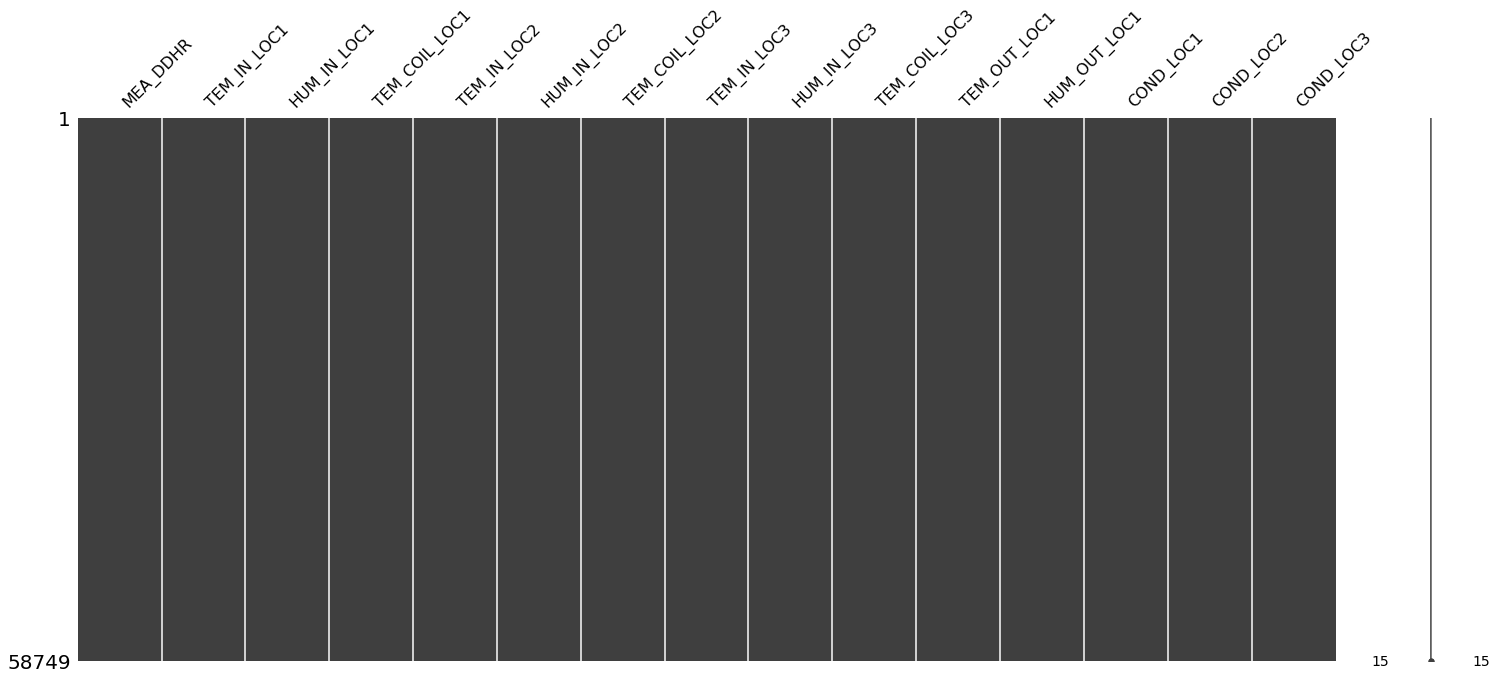

In [334]:
missingno.matrix(plant1_null)
plt.show()

In [335]:
plant1_null.isnull().sum()

MEA_DDHR         0
TEM_IN_LOC1      0
HUM_IN_LOC1      0
TEM_COIL_LOC1    0
TEM_IN_LOC2      0
HUM_IN_LOC2      0
TEM_COIL_LOC2    0
TEM_IN_LOC3      0
HUM_IN_LOC3      0
TEM_COIL_LOC3    0
TEM_OUT_LOC1     0
HUM_OUT_LOC1     0
COND_LOC1        0
COND_LOC2        0
COND_LOC3        0
dtype: int64

In [336]:
plant1_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58749 entries, 0 to 58748
Data columns (total 15 columns):
MEA_DDHR         58749 non-null object
TEM_IN_LOC1      58749 non-null float64
HUM_IN_LOC1      58749 non-null float64
TEM_COIL_LOC1    58749 non-null float64
TEM_IN_LOC2      58749 non-null float64
HUM_IN_LOC2      58749 non-null float64
TEM_COIL_LOC2    58749 non-null float64
TEM_IN_LOC3      58749 non-null float64
HUM_IN_LOC3      58749 non-null float64
TEM_COIL_LOC3    58749 non-null float64
TEM_OUT_LOC1     58749 non-null float64
HUM_OUT_LOC1     58749 non-null float64
COND_LOC1        58749 non-null float64
COND_LOC2        58749 non-null float64
COND_LOC3        58749 non-null float64
dtypes: float64(14), object(1)
memory usage: 6.7+ MB


In [337]:
plant1_null.to_csv("data/plant1_train_etl.csv", index=False, encoding="utf-8")

## plant2 결측치 처리

In [338]:
plant2 = pd.read_csv("data/plant2_train.csv", encoding="utf-8")

In [339]:
plant2 = plant2.iloc[:,1:].copy()

In [340]:
plant2.columns = plant2.columns.str.replace("plant2_train.", "")

In [341]:
plant2.columns = plant2.columns.str.upper()

In [342]:
plant2

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
0,2016-07-19 18:00,22.39,55.46,27.46,22.48,56.17,29.71,21.94,56.32,30.70,17.72,62.94,0.0,0.0,0.0
1,2016-07-19 21:00,17.81,62.64,27.08,18.09,61.94,27.88,17.75,61.78,28.61,11.37,76.95,0.0,0.0,0.0
2,2016-07-20 0:00,15.13,66.70,26.93,15.49,66.42,26.74,15.89,64.87,27.27,9.79,79.46,0.0,0.0,0.0
3,2016-07-20 3:00,13.82,68.53,26.47,14.03,69.14,26.01,14.64,67.06,26.93,8.35,81.56,0.0,0.0,0.0
4,2016-07-20 6:00,12.93,73.87,26.20,13.05,74.48,25.51,13.69,71.83,26.47,7.68,89.10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57909,2019-03-31 23:10,9.18,36.32,9.18,9.08,37.58,9.68,8.26,38.34,9.57,4.72,52.11,0.0,0.0,0.0
57910,2019-03-31 23:20,9.24,36.51,9.22,9.02,38.25,9.76,8.29,38.92,9.60,4.66,51.01,0.0,0.0,0.0
57911,2019-03-31 23:30,9.05,36.29,9.11,9.05,38.13,9.76,8.32,39.13,9.49,4.57,51.47,0.0,0.0,0.0
57912,2019-03-31 23:40,8.99,37.33,9.15,9.02,38.49,9.68,8.26,39.62,9.57,4.47,53.14,0.0,0.0,0.0


In [343]:
plant2.isnull().sum()

MEA_DDHR           0
TEM_IN_LOC1      224
HUM_IN_LOC1      224
TEM_COIL_LOC1    224
TEM_IN_LOC2      224
HUM_IN_LOC2      224
TEM_COIL_LOC2    224
TEM_IN_LOC3      224
HUM_IN_LOC3      224
TEM_COIL_LOC3    224
TEM_OUT_LOC1     224
HUM_OUT_LOC1     224
COND_LOC1        224
COND_LOC2        224
COND_LOC3        224
dtype: int64

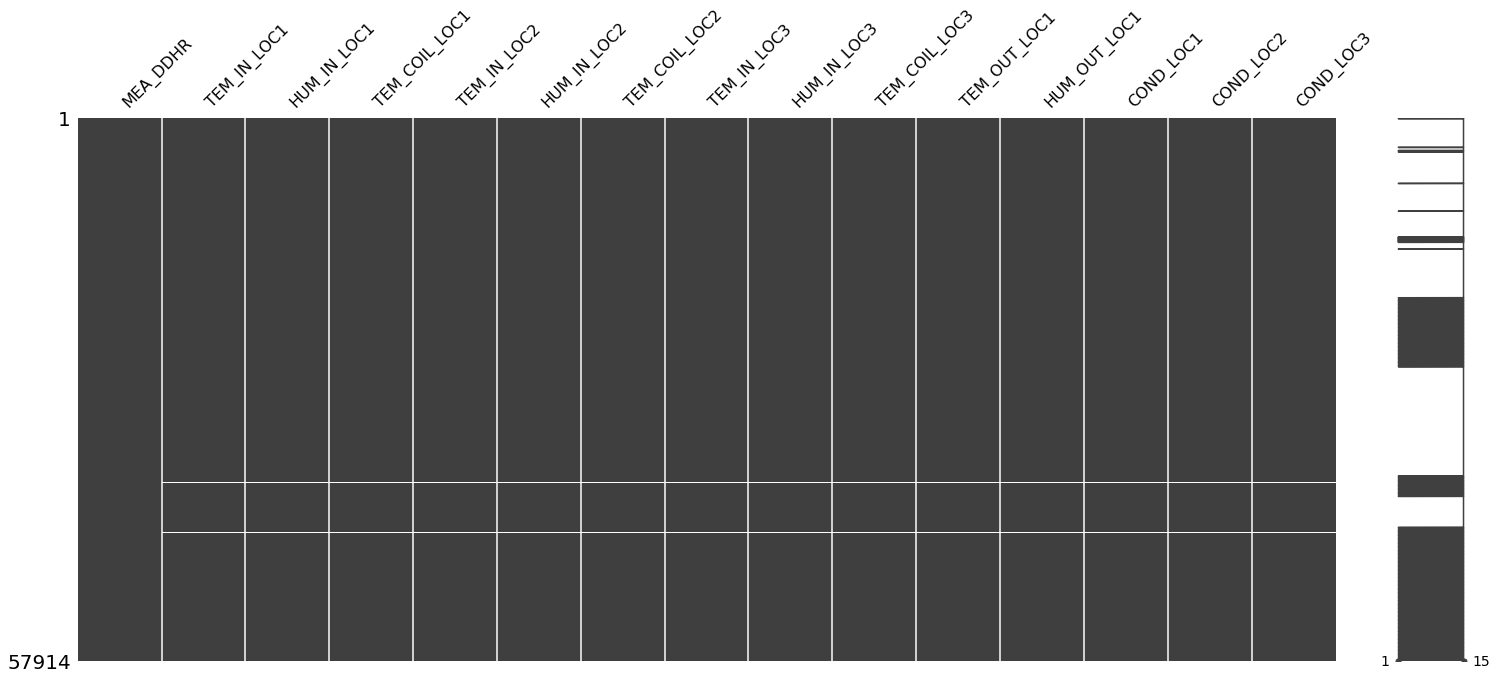

In [344]:
missingno.matrix(plant2)
plt.show()

In [345]:
plant2[plant2.TEM_IN_LOC1.isnull()]

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
99,2016-08-01 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,2016-08-01 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2016-08-01 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3165,2017-03-17 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3166,2017-03-17 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57337,2019-03-27 23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57481,2019-03-28 23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57625,2019-03-29 23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57769,2019-03-30 23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
plant2_null = plant2.copy()

### nan값 선형값으로 결측치 보간

In [347]:
plant2_null = plant2_null.interpolate(method="linear")

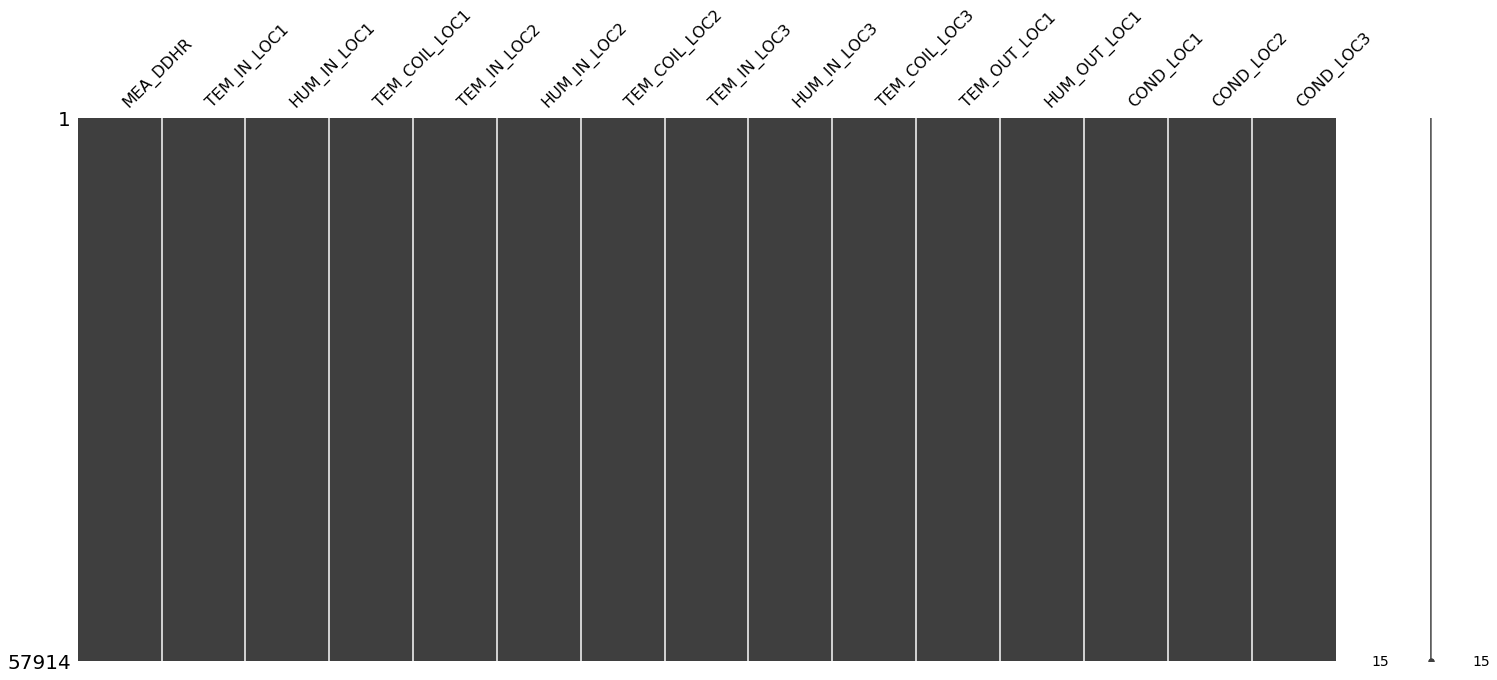

In [348]:
missingno.matrix(plant2_null)
plt.show()

In [349]:
plant2_null.isnull().sum()

MEA_DDHR         0
TEM_IN_LOC1      0
HUM_IN_LOC1      0
TEM_COIL_LOC1    0
TEM_IN_LOC2      0
HUM_IN_LOC2      0
TEM_COIL_LOC2    0
TEM_IN_LOC3      0
HUM_IN_LOC3      0
TEM_COIL_LOC3    0
TEM_OUT_LOC1     0
HUM_OUT_LOC1     0
COND_LOC1        0
COND_LOC2        0
COND_LOC3        0
dtype: int64

In [350]:
plant2_null.to_csv("data/plant2_train_etl.csv", index=False, encoding="utf-8")

## plant_test 값 확인

In [351]:
plant_test = pd.read_csv("data/plant_test.csv", encoding="utf-8")

In [352]:
plant_test = plant_test.iloc[:,1:].copy()

In [353]:
plant_test.columns = plant_test.columns.str.replace("plant_test.", "")

In [354]:
plant_test.columns = plant_test.columns.str.upper()

In [355]:
plant_test

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
3,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
4,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 3:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 3:00,NaN,2020-03-31 3:00,NaN
3535,2020-03-29 5:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 5:00,NaN,2020-03-31 5:00,NaN
3536,2020-03-29 7:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 7:00,NaN,2020-03-31 7:00,NaN
3537,2020-03-29 11:30,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30,NaN,2020-03-31 11:30,NaN


In [356]:
plant_test.describe()

,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_COND_LOC,X48H_COND_LOC
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,0.0,0.0
mean,1.479797,2.013563,16.240452,55.038604,15.744072,13.835934,65.678539,NaN,NaN
std,0.499662,0.793086,8.616490,13.863241,8.802875,9.480770,19.840867,NaN,NaN
min,1.000000,1.000000,-2.880000,18.890000,-0.320000,-7.550000,13.060000,NaN,NaN
25%,1.000000,1.000000,8.570000,44.870000,7.580000,5.880000,50.580000,NaN,NaN
50%,1.000000,2.000000,14.670000,55.400000,14.070000,12.440000,66.180000,NaN,NaN
75%,2.000000,3.000000,24.350000,65.690000,24.120000,22.135000,81.900000,NaN,NaN
max,2.000000,3.000000,34.820000,91.700000,33.450000,39.670000,100.000000,NaN,NaN


In [357]:
plant_test.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
3,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
4,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN


# plant 데이터프레임 합치기

## plant 컬럼 추가

In [358]:
plant1_null["PLANT"]=1

In [359]:
plant1_null

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3,PLANT
0,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0,1
1,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0,1
2,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0,1
3,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0,1
4,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,2019-03-31 23:10,10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0,1
58745,2019-03-31 23:20,10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0,1
58746,2019-03-31 23:30,10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0,1
58747,2019-03-31 23:40,10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0,1


In [360]:
plant2_null["PLANT"]=2

In [361]:
plant2_null

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3,PLANT
0,2016-07-19 18:00,22.39,55.46,27.46,22.48,56.17,29.71,21.94,56.32,30.70,17.72,62.94,0.0,0.0,0.0,2
1,2016-07-19 21:00,17.81,62.64,27.08,18.09,61.94,27.88,17.75,61.78,28.61,11.37,76.95,0.0,0.0,0.0,2
2,2016-07-20 0:00,15.13,66.70,26.93,15.49,66.42,26.74,15.89,64.87,27.27,9.79,79.46,0.0,0.0,0.0,2
3,2016-07-20 3:00,13.82,68.53,26.47,14.03,69.14,26.01,14.64,67.06,26.93,8.35,81.56,0.0,0.0,0.0,2
4,2016-07-20 6:00,12.93,73.87,26.20,13.05,74.48,25.51,13.69,71.83,26.47,7.68,89.10,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57909,2019-03-31 23:10,9.18,36.32,9.18,9.08,37.58,9.68,8.26,38.34,9.57,4.72,52.11,0.0,0.0,0.0,2
57910,2019-03-31 23:20,9.24,36.51,9.22,9.02,38.25,9.76,8.29,38.92,9.60,4.66,51.01,0.0,0.0,0.0,2
57911,2019-03-31 23:30,9.05,36.29,9.11,9.05,38.13,9.76,8.32,39.13,9.49,4.57,51.47,0.0,0.0,0.0,2
57912,2019-03-31 23:40,8.99,37.33,9.15,9.02,38.49,9.68,8.26,39.62,9.57,4.47,53.14,0.0,0.0,0.0,2


## plant1, 2 concat

In [362]:
plant = pd.concat([plant1_null, plant2_null])

In [363]:
plant

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3,PLANT
0,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0,1
1,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0,1
2,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0,1
3,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0,1
4,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57909,2019-03-31 23:10,9.18,36.32,9.18,9.08,37.58,9.68,8.26,38.34,9.57,4.72,52.11,0.0,0.0,0.0,2
57910,2019-03-31 23:20,9.24,36.51,9.22,9.02,38.25,9.76,8.29,38.92,9.60,4.66,51.01,0.0,0.0,0.0,2
57911,2019-03-31 23:30,9.05,36.29,9.11,9.05,38.13,9.76,8.32,39.13,9.49,4.57,51.47,0.0,0.0,0.0,2
57912,2019-03-31 23:40,8.99,37.33,9.15,9.02,38.49,9.68,8.26,39.62,9.57,4.47,53.14,0.0,0.0,0.0,2


# loc 데이터프레임 reshape 및 concat

## 각 loc에 맞는 컬럼과 LOC 값 설정

In [364]:
loc1 = plant[["MEA_DDHR", "TEM_IN_LOC1", "HUM_IN_LOC1", "TEM_COIL_LOC1", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "COND_LOC1", "PLANT"]].copy()

In [365]:
loc2 = plant[["MEA_DDHR", "TEM_IN_LOC2", "HUM_IN_LOC2", "TEM_COIL_LOC2", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "COND_LOC2", "PLANT"]].copy()

In [366]:
loc3 = plant[["MEA_DDHR", "TEM_IN_LOC3", "HUM_IN_LOC3", "TEM_COIL_LOC3", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "COND_LOC3", "PLANT"]].copy()

In [367]:
loc1['LOC']=1

In [368]:
loc2['LOC']=2

In [369]:
loc3['LOC']=3

## loc 데이터프레임 컬럼 일치화

In [370]:
loc1.columns = ["MEA_DDHR", "TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "COND_LOC", "PLANT", "LOC"]
loc2.columns = ["MEA_DDHR", "TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "COND_LOC", "PLANT", "LOC"]
loc3.columns = ["MEA_DDHR", "TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "COND_LOC", "PLANT", "LOC"]

In [371]:
loc1

,MEA_DDHR,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,PLANT,LOC
0,2016-04-01 0:00,16.00,24.00,11.00,9.00,42.00,0.0,1,1
1,2016-04-01 3:00,14.00,28.00,10.00,7.00,59.00,0.0,1,1
2,2016-04-01 6:00,13.00,33.00,10.00,6.00,56.00,0.0,1,1
3,2016-04-01 9:00,13.00,33.00,10.00,18.00,30.00,0.0,1,1
4,2016-04-01 12:00,16.00,28.00,10.00,18.00,20.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...
57909,2019-03-31 23:10,9.18,36.32,9.18,4.72,52.11,0.0,2,1
57910,2019-03-31 23:20,9.24,36.51,9.22,4.66,51.01,0.0,2,1
57911,2019-03-31 23:30,9.05,36.29,9.11,4.57,51.47,0.0,2,1
57912,2019-03-31 23:40,8.99,37.33,9.15,4.47,53.14,0.0,2,1


In [372]:
loc2

,MEA_DDHR,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,PLANT,LOC
0,2016-04-01 0:00,14.00,23.00,11.00,9.00,42.00,0.0,1,2
1,2016-04-01 3:00,12.00,32.00,9.00,7.00,59.00,0.0,1,2
2,2016-04-01 6:00,11.00,37.00,9.00,6.00,56.00,0.0,1,2
3,2016-04-01 9:00,11.00,35.00,9.00,18.00,30.00,0.0,1,2
4,2016-04-01 12:00,15.00,27.00,11.00,18.00,20.00,0.0,1,2
...,...,...,...,...,...,...,...,...,...
57909,2019-03-31 23:10,9.08,37.58,9.68,4.72,52.11,0.0,2,2
57910,2019-03-31 23:20,9.02,38.25,9.76,4.66,51.01,0.0,2,2
57911,2019-03-31 23:30,9.05,38.13,9.76,4.57,51.47,0.0,2,2
57912,2019-03-31 23:40,9.02,38.49,9.68,4.47,53.14,0.0,2,2


In [373]:
loc3

,MEA_DDHR,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,PLANT,LOC
0,2016-04-01 0:00,13.00,32.00,10.00,9.00,42.00,0.0,1,3
1,2016-04-01 3:00,11.00,42.00,7.00,7.00,59.00,0.0,1,3
2,2016-04-01 6:00,10.00,44.00,7.00,6.00,56.00,0.0,1,3
3,2016-04-01 9:00,10.00,41.00,8.00,18.00,30.00,0.0,1,3
4,2016-04-01 12:00,14.00,30.00,9.00,18.00,20.00,0.0,1,3
...,...,...,...,...,...,...,...,...,...
57909,2019-03-31 23:10,8.26,38.34,9.57,4.72,52.11,0.0,2,3
57910,2019-03-31 23:20,8.29,38.92,9.60,4.66,51.01,0.0,2,3
57911,2019-03-31 23:30,8.32,39.13,9.49,4.57,51.47,0.0,2,3
57912,2019-03-31 23:40,8.26,39.62,9.57,4.47,53.14,0.0,2,3


## loc 데이터프레임 concat

In [374]:
loc = pd.concat([loc1, loc2, loc3])

### Date 기준으로 concat 데이터 정렬

In [375]:
plant = loc.sort_values(by="MEA_DDHR")

In [376]:
plant.reset_index(drop=True, inplace=True)

In [377]:
plant.tail(20)

,MEA_DDHR,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,PLANT,LOC
349969,2019-03-31 9:20,9.94,40.84,10.52,10.73,32.51,0.0,1,1
349970,2019-03-31 9:20,10.61,40.05,9.95,10.73,32.51,0.0,1,3
349971,2019-03-31 9:30,10.09,41.03,10.44,9.97,36.69,0.0,1,1
349972,2019-03-31 9:30,9.48,39.13,8.99,7.77,44.99,0.0,2,1
349973,2019-03-31 9:30,11.01,37.24,11.17,9.97,36.69,0.0,1,2
349974,2019-03-31 9:30,8.96,40.87,9.87,7.77,44.99,0.0,2,3
349975,2019-03-31 9:30,9.73,41.64,9.91,7.77,44.99,0.0,2,2
349976,2019-03-31 9:30,10.67,40.48,9.91,9.97,36.69,0.0,1,3
349977,2019-03-31 9:40,10.67,40.11,9.91,9.51,37.64,0.0,1,3
349978,2019-03-31 9:40,9.76,41.79,9.76,7.28,45.42,0.0,2,2


### plant reshape

In [378]:
plant = plant[["MEA_DDHR", "PLANT", "LOC", "TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "COND_LOC"]]

In [379]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC
0,2016-04-01 0:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0
1,2016-04-01 0:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0
2,2016-04-01 0:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0
3,2016-04-01 12:00,1,1,16.00,28.00,10.00,18.00,20.00,0.0
4,2016-04-01 12:00,1,2,15.00,27.00,11.00,18.00,20.00,0.0
...,...,...,...,...,...,...,...,...,...
349984,2019-03-31 9:50,2,3,9.11,41.03,9.91,7.16,44.63,0.0
349985,2019-03-31 9:50,1,1,10.21,40.38,10.52,9.15,37.61,0.0
349986,2019-03-31 9:50,1,2,11.16,36.94,11.21,9.15,37.61,0.0
349987,2019-03-31 9:50,1,3,10.79,40.08,9.87,9.15,37.61,0.0


In [380]:
plant.to_csv("data/plant_train.csv", index=False, encoding="utf-8")

# 24시간, 48시간 결로발생 변수 생성

## X24H_TMA, X48H_TMA 생성(Date 컬럼)

In [381]:
from datetime import datetime, timedelta

In [382]:
plant['X24H_TMA'] = pd.DatetimeIndex(plant["MEA_DDHR"]) + timedelta(days=1)
plant['X48H_TMA'] = pd.DatetimeIndex(plant["MEA_DDHR"]) + timedelta(days=2)

In [383]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA
0,2016-04-01 0:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,2016-04-03 00:00:00
1,2016-04-01 0:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,2016-04-03 00:00:00
2,2016-04-01 0:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,2016-04-03 00:00:00
3,2016-04-01 12:00,1,1,16.00,28.00,10.00,18.00,20.00,0.0,2016-04-02 12:00:00,2016-04-03 12:00:00
4,2016-04-01 12:00,1,2,15.00,27.00,11.00,18.00,20.00,0.0,2016-04-02 12:00:00,2016-04-03 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...
349984,2019-03-31 9:50,2,3,9.11,41.03,9.91,7.16,44.63,0.0,2019-04-01 09:50:00,2019-04-02 09:50:00
349985,2019-03-31 9:50,1,1,10.21,40.38,10.52,9.15,37.61,0.0,2019-04-01 09:50:00,2019-04-02 09:50:00
349986,2019-03-31 9:50,1,2,11.16,36.94,11.21,9.15,37.61,0.0,2019-04-01 09:50:00,2019-04-02 09:50:00
349987,2019-03-31 9:50,1,3,10.79,40.08,9.87,9.15,37.61,0.0,2019-04-01 09:50:00,2019-04-02 09:50:00


In [384]:
plant['MEA_DDHR'] = pd.to_datetime(plant['MEA_DDHR'])

plant['PLANT'] = plant['PLANT'].astype(str)
plant['LOC'] = plant['LOC'].astype(str)

plant['MEA_DDHR'] = plant['MEA_DDHR'].astype(str)
plant['MEA_DDHR'] = plant['MEA_DDHR'].str.slice(start=0, stop=16)

plant['X24H_TMA'] = plant['X24H_TMA'].astype(str)
plant['X24H_TMA'] = plant['X24H_TMA'].str.slice(start=0, stop=16)

plant['X48H_TMA'] = plant['X48H_TMA'].astype(str)
plant['X48H_TMA'] = plant['X48H_TMA'].str.slice(start=0, stop=16)

In [385]:
plant.dtypes

MEA_DDHR         object
PLANT            object
LOC              object
TEM_IN          float64
HUM_IN          float64
TEM_COIL        float64
TEM_OUT_LOC1    float64
HUM_OUT_LOC1    float64
COND_LOC        float64
X24H_TMA         object
X48H_TMA         object
dtype: object

## X24H_COND_LOC, X48H_COND_LOC 컬럼 생성

### 참조용 컬럼 생성

In [386]:
plant['MPL'] = plant['PLANT'] + plant['LOC'] + ' ' + plant['MEA_DDHR']
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,MPL
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,11 2016-04-01 00:00
1,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,13 2016-04-01 00:00
2,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,12 2016-04-01 00:00
3,2016-04-01 12:00,1,1,16.0,28.0,10.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,11 2016-04-01 12:00
4,2016-04-01 12:00,1,2,15.0,27.0,11.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,12 2016-04-01 12:00


In [387]:
plant['X24PL'] = plant['PLANT'] + plant['LOC'] + ' ' + plant['X24H_TMA']
plant['X48PL'] = plant['PLANT'] + plant['LOC'] + ' ' + plant['X48H_TMA']
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,MPL,X24PL,X48PL
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,11 2016-04-01 00:00,11 2016-04-02 00:00,11 2016-04-03 00:00
1,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,13 2016-04-01 00:00,13 2016-04-02 00:00,13 2016-04-03 00:00
2,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,12 2016-04-01 00:00,12 2016-04-02 00:00,12 2016-04-03 00:00
3,2016-04-01 12:00,1,1,16.0,28.0,10.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,11 2016-04-01 12:00,11 2016-04-02 12:00,11 2016-04-03 12:00
4,2016-04-01 12:00,1,2,15.0,27.0,11.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,12 2016-04-01 12:00,12 2016-04-02 12:00,12 2016-04-03 12:00


### 현시점, 24시간후, 48시간후의 subset 생성

In [388]:
time_0 = plant[['MPL', 'COND_LOC']].copy()
time_24 = plant[['X24PL']].copy()
time_48 = plant[['X48PL']].copy()
time_0.head()

,MPL,COND_LOC
0,11 2016-04-01 00:00,0.0
1,13 2016-04-01 00:00,0.0
2,12 2016-04-01 00:00,0.0
3,11 2016-04-01 12:00,0.0
4,12 2016-04-01 12:00,0.0


### merge

In [389]:
time_24_merge = time_24.merge(time_0, how='left', left_on='X24PL', right_on='MPL')
time_24_merge.rename({'COND_LOC':'X24H_COND_LOC'}, axis='columns', inplace=True)
time_24_merge.head()

,X24PL,MPL,X24H_COND_LOC
0,11 2016-04-02 00:00,11 2016-04-02 00:00,0.0
1,13 2016-04-02 00:00,13 2016-04-02 00:00,0.0
2,12 2016-04-02 00:00,12 2016-04-02 00:00,0.0
3,11 2016-04-02 12:00,11 2016-04-02 12:00,0.0
4,12 2016-04-02 12:00,12 2016-04-02 12:00,0.0


In [390]:
plant.shape

(349989, 14)

In [391]:
time_24.shape

(349989, 1)

In [392]:
time_48_merge = time_48.merge(time_0, how='left', left_on='X48PL', right_on='MPL')
time_48_merge.rename({'COND_LOC':'X48H_COND_LOC'}, axis='columns', inplace=True)
time_48_merge.head()

,X48PL,MPL,X48H_COND_LOC
0,11 2016-04-03 00:00,11 2016-04-03 00:00,0.0
1,13 2016-04-03 00:00,13 2016-04-03 00:00,0.0
2,12 2016-04-03 00:00,12 2016-04-03 00:00,0.0
3,11 2016-04-03 12:00,11 2016-04-03 12:00,0.0
4,12 2016-04-03 12:00,12 2016-04-03 12:00,0.0


In [393]:
time_24_merge.isnull().sum()

X24PL               0
MPL              2430
X24H_COND_LOC    2430
dtype: int64

In [394]:
time_48_merge.isnull().sum()

X48PL               0
MPL              3564
X48H_COND_LOC    3564
dtype: int64

In [395]:
X24H_COND_LOC = time_24_merge['X24H_COND_LOC']
plant_24plus = pd.concat([plant, X24H_COND_LOC], axis=1)
plant_24plus.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,MPL,X24PL,X48PL,X24H_COND_LOC
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,11 2016-04-01 00:00,11 2016-04-02 00:00,11 2016-04-03 00:00,0.0
1,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,13 2016-04-01 00:00,13 2016-04-02 00:00,13 2016-04-03 00:00,0.0
2,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,12 2016-04-01 00:00,12 2016-04-02 00:00,12 2016-04-03 00:00,0.0
3,2016-04-01 12:00,1,1,16.0,28.0,10.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,11 2016-04-01 12:00,11 2016-04-02 12:00,11 2016-04-03 12:00,0.0
4,2016-04-01 12:00,1,2,15.0,27.0,11.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,12 2016-04-01 12:00,12 2016-04-02 12:00,12 2016-04-03 12:00,0.0


In [396]:
X48H_COND_LOC = time_48_merge['X48H_COND_LOC']
plant_48plus = pd.concat([plant_24plus, X48H_COND_LOC], axis=1)
plant_48plus.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,MPL,X24PL,X48PL,X24H_COND_LOC,X48H_COND_LOC
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,11 2016-04-01 00:00,11 2016-04-02 00:00,11 2016-04-03 00:00,0.0,0.0
1,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,13 2016-04-01 00:00,13 2016-04-02 00:00,13 2016-04-03 00:00,0.0,0.0
2,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,12 2016-04-01 00:00,12 2016-04-02 00:00,12 2016-04-03 00:00,0.0,0.0
3,2016-04-01 12:00,1,1,16.0,28.0,10.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,11 2016-04-01 12:00,11 2016-04-02 12:00,11 2016-04-03 12:00,0.0,0.0
4,2016-04-01 12:00,1,2,15.0,27.0,11.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,12 2016-04-01 12:00,12 2016-04-02 12:00,12 2016-04-03 12:00,0.0,0.0


In [397]:
plant = plant_48plus.copy()
plant.columns

Index(['MEA_DDHR', 'PLANT', 'LOC', 'TEM_IN', 'HUM_IN', 'TEM_COIL',
       'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'COND_LOC', 'X24H_TMA', 'X48H_TMA',
       'MPL', 'X24PL', 'X48PL', 'X24H_COND_LOC', 'X48H_COND_LOC'],
      dtype='object')

In [398]:
plant = plant.drop(columns=['MPL','X24PL', 'X48PL'])
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,X24H_COND_LOC,X48H_COND_LOC
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,0.0,0.0
1,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,0.0,0.0
2,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,0.0,0.0
3,2016-04-01 12:00,1,1,16.0,28.0,10.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,0.0,0.0
4,2016-04-01 12:00,1,2,15.0,27.0,11.0,18.0,20.0,0.0,2016-04-02 12:00,2016-04-03 12:00,0.0,0.0


In [399]:
plant.isnull().sum()

MEA_DDHR            0
PLANT               0
LOC                 0
TEM_IN              0
HUM_IN              0
TEM_COIL            0
TEM_OUT_LOC1        0
HUM_OUT_LOC1        0
COND_LOC            0
X24H_TMA            0
X48H_TMA            0
X24H_COND_LOC    2430
X48H_COND_LOC    3564
dtype: int64

## 24, 48시간 후 결로발생여부 결측치 처리

In [400]:
plant['X24H_COND_LOC'].value_counts()

0.0    345580
1.0      1979
Name: X24H_COND_LOC, dtype: int64

In [401]:
plant['X48H_COND_LOC'].value_counts()

0.0    344446
1.0      1979
Name: X48H_COND_LOC, dtype: int64

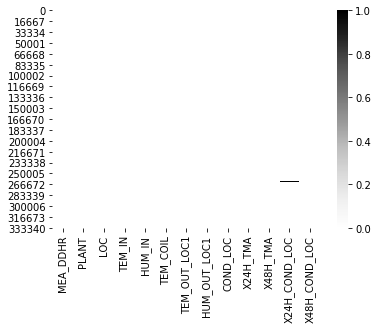

In [402]:
sns.heatmap(plant.isnull(), cmap='Greys')

In [403]:
plant = plant.fillna(0)
plant.isnull().sum()

MEA_DDHR         0
PLANT            0
LOC              0
TEM_IN           0
HUM_IN           0
TEM_COIL         0
TEM_OUT_LOC1     0
HUM_OUT_LOC1     0
COND_LOC         0
X24H_TMA         0
X48H_TMA         0
X24H_COND_LOC    0
X48H_COND_LOC    0
dtype: int64

In [404]:
plant.columns

Index(['MEA_DDHR', 'PLANT', 'LOC', 'TEM_IN', 'HUM_IN', 'TEM_COIL',
       'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'COND_LOC', 'X24H_TMA', 'X48H_TMA',
       'X24H_COND_LOC', 'X48H_COND_LOC'],
      dtype='object')

In [405]:
plant = plant[['MEA_DDHR', 'PLANT', 'LOC', 'TEM_IN', 'HUM_IN', 'TEM_COIL',
       'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'COND_LOC', 'X24H_TMA', 'X24H_COND_LOC', 'X48H_TMA', 'X48H_COND_LOC']]

In [406]:
plant.to_csv('data/plant_train_etl.csv', encoding='utf-8', index=False)

In [407]:
plant['MEA_DDHR'] = pd.to_datetime(plant['MEA_DDHR'])
plant['X24H_TMA'] = pd.to_datetime(plant['X24H_TMA'])
plant['X48H_TMA'] = pd.to_datetime(plant['X48H_TMA'])

plant.dtypes

MEA_DDHR         datetime64[ns]
PLANT                    object
LOC                      object
TEM_IN                  float64
HUM_IN                  float64
TEM_COIL                float64
TEM_OUT_LOC1            float64
HUM_OUT_LOC1            float64
COND_LOC                float64
X24H_TMA         datetime64[ns]
X24H_COND_LOC           float64
X48H_TMA         datetime64[ns]
X48H_COND_LOC           float64
dtype: object

In [408]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
1,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
2,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
3,2016-04-01 12:00:00,1,1,16.00,28.00,10.00,18.00,20.00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0
4,2016-04-01 12:00:00,1,2,15.00,27.00,11.00,18.00,20.00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349984,2019-03-31 09:50:00,2,3,9.11,41.03,9.91,7.16,44.63,0.0,2019-04-01 09:50:00,0.0,2019-04-02 09:50:00,0.0
349985,2019-03-31 09:50:00,1,1,10.21,40.38,10.52,9.15,37.61,0.0,2019-04-01 09:50:00,0.0,2019-04-02 09:50:00,0.0
349986,2019-03-31 09:50:00,1,2,11.16,36.94,11.21,9.15,37.61,0.0,2019-04-01 09:50:00,0.0,2019-04-02 09:50:00,0.0
349987,2019-03-31 09:50:00,1,3,10.79,40.08,9.87,9.15,37.61,0.0,2019-04-01 09:50:00,0.0,2019-04-02 09:50:00,0.0


In [409]:
import sys
import numpy as np
 
# approximation valid for
# 0 degC < T < 60 degC
# 1% < RH < 100%
# 0 degC < Td < 50 degC 
 
# constants
a = 17.271
b = 237.7 # degC
def dewpoint_approximation(T,RH):
 
    Td = (b * gamma(T,RH)) / (a - gamma(T,RH))
 
    return Td
 
def gamma(T,RH):
 
    g = (a * T / (b + T)) + np.log(RH/100.0)
 
    return g
plant["DEW_POINT_IN"] = dewpoint_approximation(plant["TEM_IN"], plant["HUM_IN"])

In [410]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_IN
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-4.561169
1,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-3.309370
2,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-6.805218
3,2016-04-01 12:00:00,1,1,16.00,28.00,10.00,18.00,20.00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-2.502215
4,2016-04-01 12:00:00,1,2,15.00,27.00,11.00,18.00,20.00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-3.847382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349984,2019-03-31 09:50:00,2,3,9.11,41.03,9.91,7.16,44.63,0.0,2019-04-01 09:50:00,0.0,2019-04-02 09:50:00,0.0,-3.436797
349985,2019-03-31 09:50:00,1,1,10.21,40.38,10.52,9.15,37.61,0.0,2019-04-01 09:50:00,0.0,2019-04-02 09:50:00,0.0,-2.661100
349986,2019-03-31 09:50:00,1,2,11.16,36.94,11.21,9.15,37.61,0.0,2019-04-01 09:50:00,0.0,2019-04-02 09:50:00,0.0,-3.008095
349987,2019-03-31 09:50:00,1,3,10.79,40.08,9.87,9.15,37.61,0.0,2019-04-01 09:50:00,0.0,2019-04-02 09:50:00,0.0,-2.240575


In [411]:
plant_pre = plant.drop('DEW_POINT_IN', axis=1)

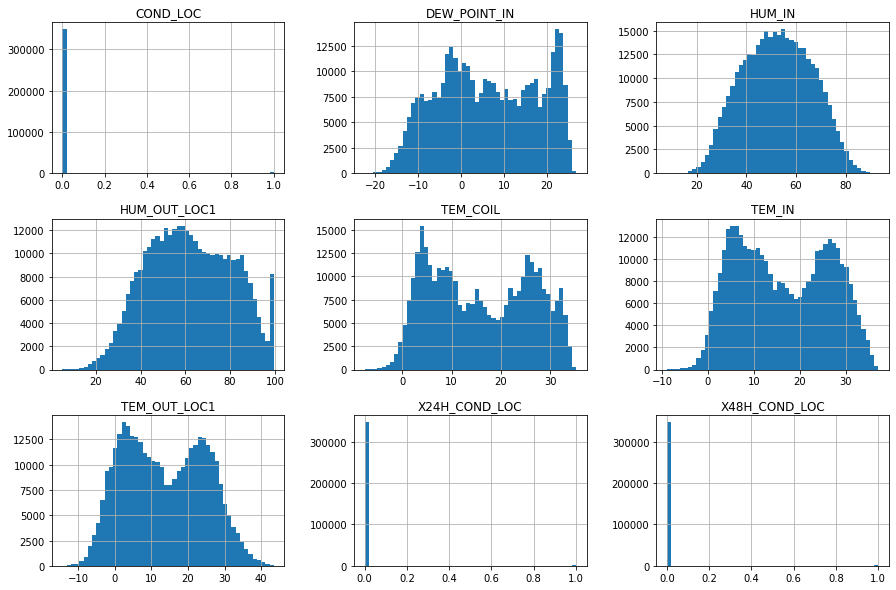

In [412]:
plant.hist(bins=50, figsize=(15,10))
plt.show()

In [413]:
plant.dtypes

MEA_DDHR         datetime64[ns]
PLANT                    object
LOC                      object
TEM_IN                  float64
HUM_IN                  float64
TEM_COIL                float64
TEM_OUT_LOC1            float64
HUM_OUT_LOC1            float64
COND_LOC                float64
X24H_TMA         datetime64[ns]
X24H_COND_LOC           float64
X48H_TMA         datetime64[ns]
X48H_COND_LOC           float64
DEW_POINT_IN            float64
dtype: object

In [414]:
#plant['PLANT_LOC'] = plant['PLANT'] + '_' + plant['LOC']

In [415]:
#plant[plant['COND_LOC']==1]['PLANT_LOC'].value_counts()

In [416]:
plant[abs(plant['TEM_OUT_LOC1']-plant['TEM_IN'])>=5]['COND_LOC'].value_counts()

0.0    69238
1.0       15
Name: COND_LOC, dtype: int64

In [417]:
plant['COND_LOC'].value_counts()

0.0    348010
1.0      1979
Name: COND_LOC, dtype: int64

In [418]:
plant[['MEA_DDHR', 'COND_LOC']].dtypes

MEA_DDHR    datetime64[ns]
COND_LOC           float64
dtype: object

In [419]:
plant['PLANT'] = plant['PLANT'].astype(int)
plant['LOC'] = plant['LOC'].astype(int)

# 데이터 시계열 특성 확인

## 공장, 센서별 전체 시간에 따른 결로 확인

In [420]:
time_series = plant[['MEA_DDHR', 'COND_LOC','PLANT', 'LOC']].copy()

In [421]:
time_series.sort_values(['MEA_DDHR'], inplace=True)

In [422]:
time_series.dtypes

MEA_DDHR    datetime64[ns]
COND_LOC           float64
PLANT                int32
LOC                  int32
dtype: object

In [423]:
plantloc = time_series[['MEA_DDHR', 'COND_LOC']]

In [424]:
plantloc.sort_values('MEA_DDHR')

,MEA_DDHR,COND_LOC
0,2016-04-01 00:00:00,0.0
1,2016-04-01 00:00:00,0.0
2,2016-04-01 00:00:00,0.0
17,2016-04-01 03:00:00,0.0
16,2016-04-01 03:00:00,0.0
...,...,...
349697,2019-03-31 23:50:00,0.0
349699,2019-03-31 23:50:00,0.0
349695,2019-03-31 23:50:00,0.0
349696,2019-03-31 23:50:00,0.0


In [425]:
plantloc.set_index('MEA_DDHR', inplace=True)

In [426]:
plantloc_11 = plant[(plant['PLANT'] == 1) & (plant['LOC'] == 1)]
plantloc_12 = plant[(plant['PLANT'] == 1) & (plant['LOC'] == 2)]
plantloc_13 = plant[(plant['PLANT'] == 1) & (plant['LOC'] == 3)]
plantloc_21 = plant[(plant['PLANT'] == 2) & (plant['LOC'] == 1)]
plantloc_22 = plant[(plant['PLANT'] == 2) & (plant['LOC'] == 2)]
plantloc_23 = plant[(plant['PLANT'] == 2) & (plant['LOC'] == 3)]

In [427]:
test11 = plantloc_11[['MEA_DDHR', 'COND_LOC']]
test12 = plantloc_12[['MEA_DDHR', 'COND_LOC']]
test13 = plantloc_13[['MEA_DDHR', 'COND_LOC']]
test21 = plantloc_21[['MEA_DDHR', 'COND_LOC']]
test22 = plantloc_22[['MEA_DDHR', 'COND_LOC']]
test23 = plantloc_23[['MEA_DDHR', 'COND_LOC']]

In [428]:
test11.sort_values('MEA_DDHR')
test12.sort_values('MEA_DDHR')
test13.sort_values('MEA_DDHR')
test21.sort_values('MEA_DDHR')
test22.sort_values('MEA_DDHR')
test23.sort_values('MEA_DDHR')

,MEA_DDHR,COND_LOC
2629,2016-07-19 18:00:00,0.0
2634,2016-07-19 21:00:00,0.0
2649,2016-07-20 00:00:00,0.0
2679,2016-07-20 03:00:00,0.0
2686,2016-07-20 06:00:00,0.0
...,...,...
349671,2019-03-31 23:10:00,0.0
349682,2019-03-31 23:20:00,0.0
349687,2019-03-31 23:30:00,0.0
349690,2019-03-31 23:40:00,0.0


In [429]:
test11.set_index('MEA_DDHR', inplace=True)
test12.set_index('MEA_DDHR', inplace=True)
test13.set_index('MEA_DDHR', inplace=True)
test21.set_index('MEA_DDHR', inplace=True)
test22.set_index('MEA_DDHR', inplace=True)
test23.set_index('MEA_DDHR', inplace=True)

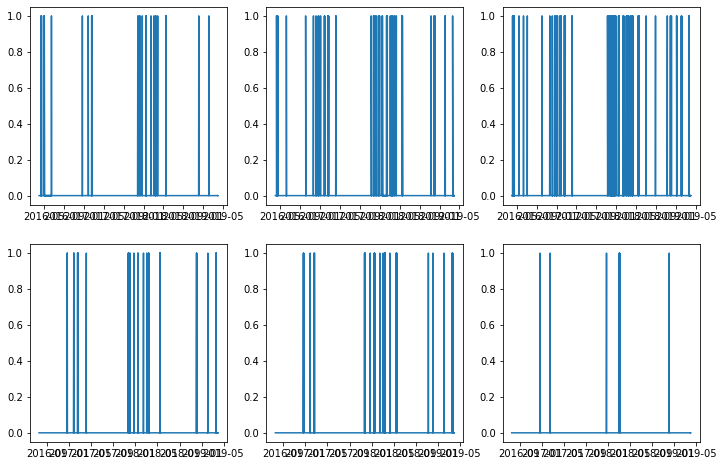

In [430]:
plt.rcParams['figure.figsize'] = [12,8]
plt.subplot(2,3,1)
plt.plot(test11)

plt.subplot(2,3,2)
plt.plot(test12)

plt.subplot(2,3,3)
plt.plot(test13)

plt.subplot(2,3,4)
plt.plot(test21)

plt.subplot(2,3,5)
plt.plot(test22)

plt.subplot(2,3,6)
plt.plot(test23)

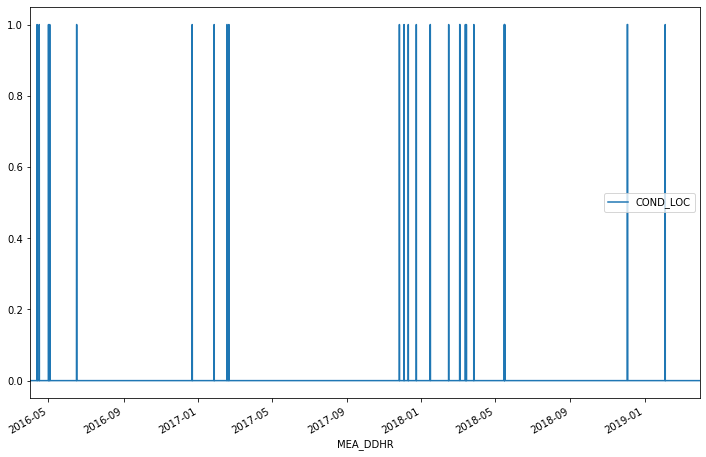

In [431]:
test11.plot()
plt.show()

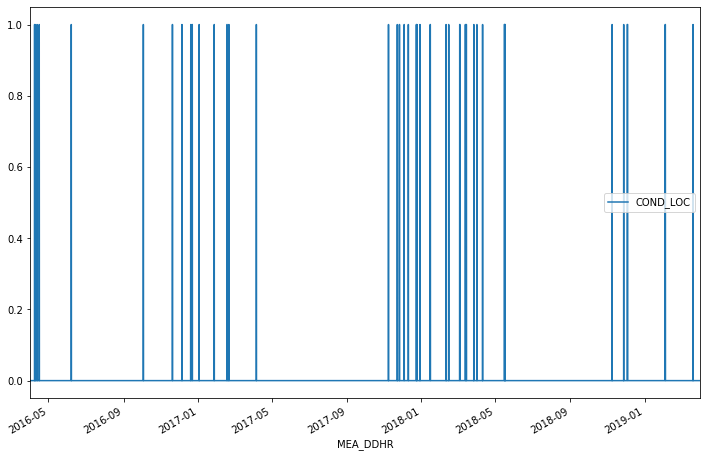

In [432]:
test12.plot()
plt.show()

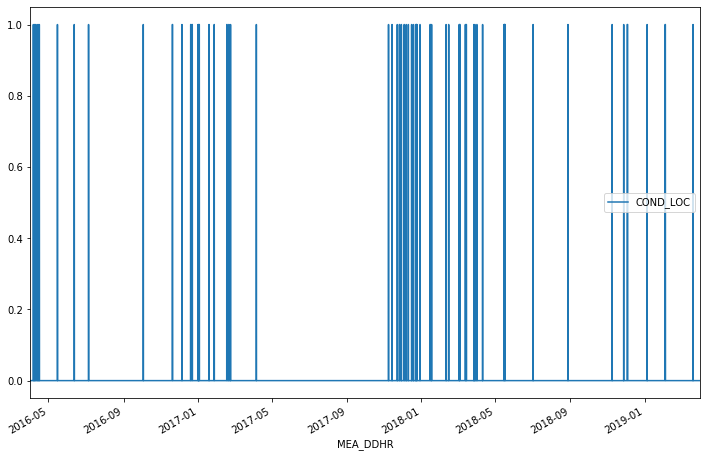

In [433]:
test13.plot()
plt.show()

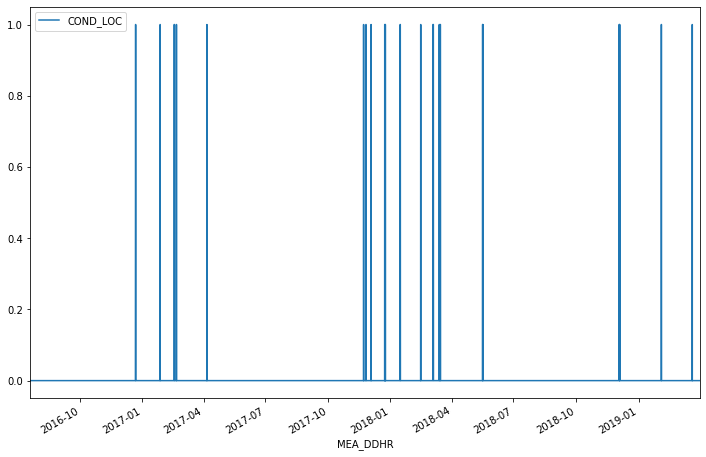

In [434]:
test21.plot()
plt.show()

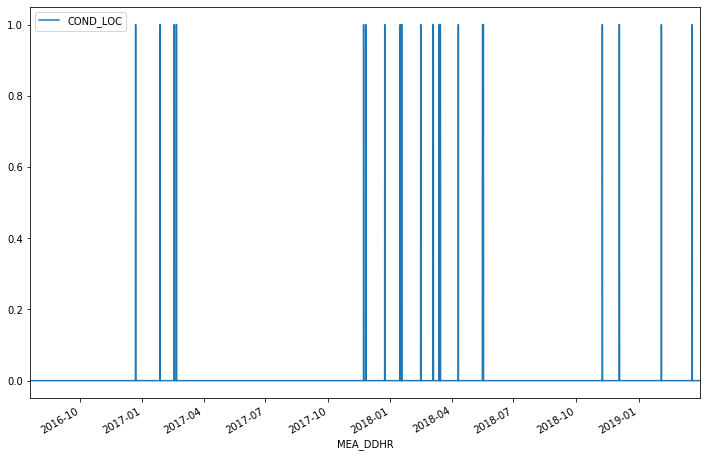

In [435]:
test22.plot()
plt.show()

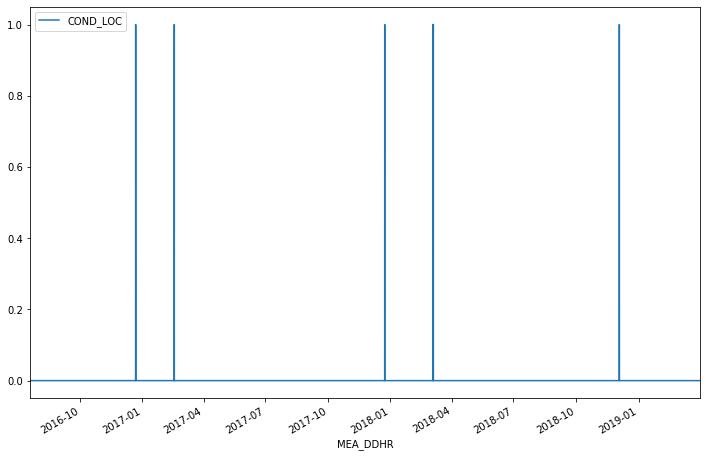

In [436]:
test23.plot()
plt.show()

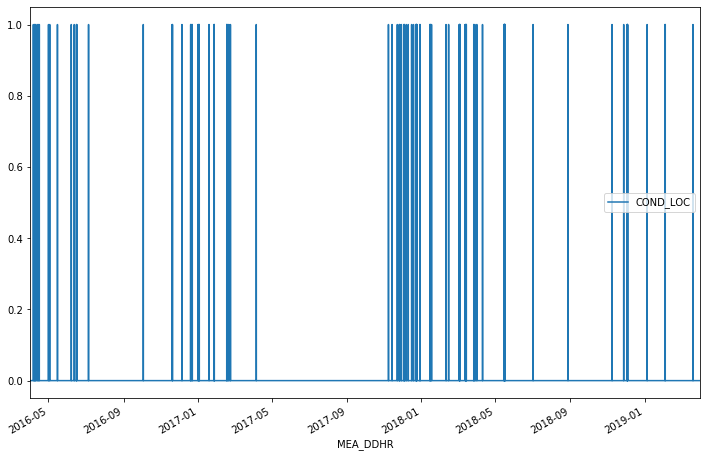

In [437]:
plt.rcParams['figure.figsize'] = [12,8]
plantloc.plot()
plt.show()

# 정규화(원핫 인코딩 + 표준화)

In [438]:
from sklearn.preprocessing import StandardScaler
def preprosess(data):
    scaling_features = data[['TEM_IN', 'HUM_IN', "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "DEW_POINT_IN"]]
    scaler = StandardScaler()
    scaled_nd = scaler.fit_transform(scaling_features)
    scaled_df = pd.DataFrame(scaled_nd, columns=scaling_features.columns)
    data.drop(['TEM_IN', 'HUM_IN', "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1", "DEW_POINT_IN"], axis=1, inplace=True)
    data = pd.concat([data,scaled_df ], axis=1)
    category = ["PLANT", "LOC"]
    data = pd.get_dummies(data , columns=category)

    return data

In [439]:
plant = preprosess(plant)
plant.head()

,MEA_DDHR,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.036157,-2.057810,-0.486255,-0.416223,-1.061976,-0.948449,1,0,1,0,0
1,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.336945,-1.480637,-0.585185,-0.416223,-1.061976,-0.838583,1,0,0,0,1
2,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.236682,-2.129957,-0.486255,-0.416223,-1.061976,-1.145401,1,0,0,1,0
3,2016-04-01 12:00:00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-0.036157,-1.769223,-0.585185,0.395974,-2.233470,-0.767742,1,0,1,0,0
4,2016-04-01 12:00:00,0.0,2016-04-02 12:00:00,0.0,2016-04-03 12:00:00,0.0,-0.136420,-1.841370,-0.486255,0.395974,-2.233470,-0.885803,1,0,0,1,0


# 모델링

## train, test 데이터 분리

In [440]:
plant = plant.drop(['MEA_DDHR', 'X24H_TMA', 'X48H_TMA'], axis=1)

In [441]:
plant.head()

,COND_LOC,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,0.0,0.0,0.0,-0.036157,-2.057810,-0.486255,-0.416223,-1.061976,-0.948449,1,0,1,0,0
1,0.0,0.0,0.0,-0.336945,-1.480637,-0.585185,-0.416223,-1.061976,-0.838583,1,0,0,0,1
2,0.0,0.0,0.0,-0.236682,-2.129957,-0.486255,-0.416223,-1.061976,-1.145401,1,0,0,1,0
3,0.0,0.0,0.0,-0.036157,-1.769223,-0.585185,0.395974,-2.233470,-0.767742,1,0,1,0,0
4,0.0,0.0,0.0,-0.136420,-1.841370,-0.486255,0.395974,-2.233470,-0.885803,1,0,0,1,0


In [442]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train24_y = plant[['X24H_COND_LOC']]
train48_y = plant[['X48H_COND_LOC']]

In [443]:
train_Xo = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC', 'DEW_POINT_IN'], axis=1)

In [444]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_X, train24_y, test_size=0.3, shuffle=True, random_state=42)

In [445]:
from sklearn.model_selection import train_test_split
X_train48, X_val48, y_train48, y_val48 = train_test_split(train_X, train48_y, test_size=0.3, shuffle=True, random_state=42)

In [446]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train24_over, y_train24_over = smote.fit_sample(X_train24, y_train24)

In [447]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train48_over, y_train48_over = smote.fit_sample(X_train48, y_train48)

## Random Forest

In [448]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [449]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train24_over, y_train24_over)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [450]:
y_pred24 = rf_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104368
         1.0       0.51      0.75      0.61       629

    accuracy                           0.99    104997
   macro avg       0.76      0.87      0.80    104997
weighted avg       1.00      0.99      0.99    104997



In [451]:
imp_rf24_df = pd.DataFrame(data=np.c_[train24_X.columns.values, rf_model24.feature_importances_], columns=['variable', 'importance'])

In [452]:
imp_rf24_df.sort_values(by='importance', ascending=False, inplace=True)

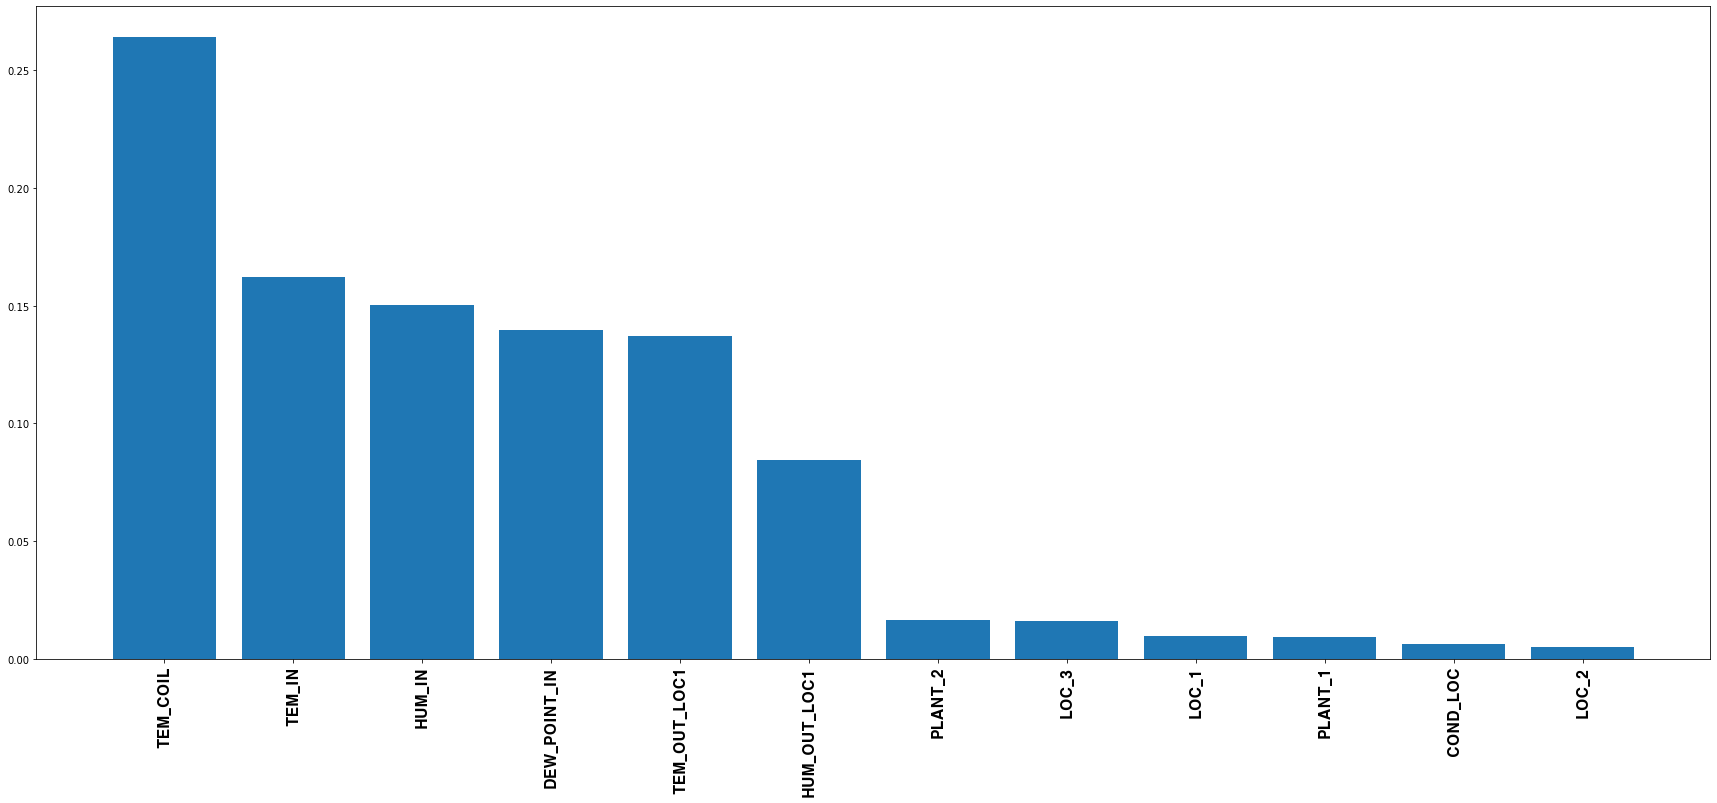

In [453]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf24_df.variable, imp_rf24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [454]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train48, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [455]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train48_over, y_train48_over)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [456]:
y_pred48 = rf_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    104408
         1.0       0.40      0.64      0.49       589

    accuracy                           0.99    104997
   macro avg       0.70      0.82      0.75    104997
weighted avg       0.99      0.99      0.99    104997



In [457]:
imp_rf48_df = pd.DataFrame(data=np.c_[train48_X.columns.values, rf_model48.feature_importances_], columns=['variable', 'importance'])
imp_rf48_df.sort_values(by='importance', ascending=False, inplace=True)

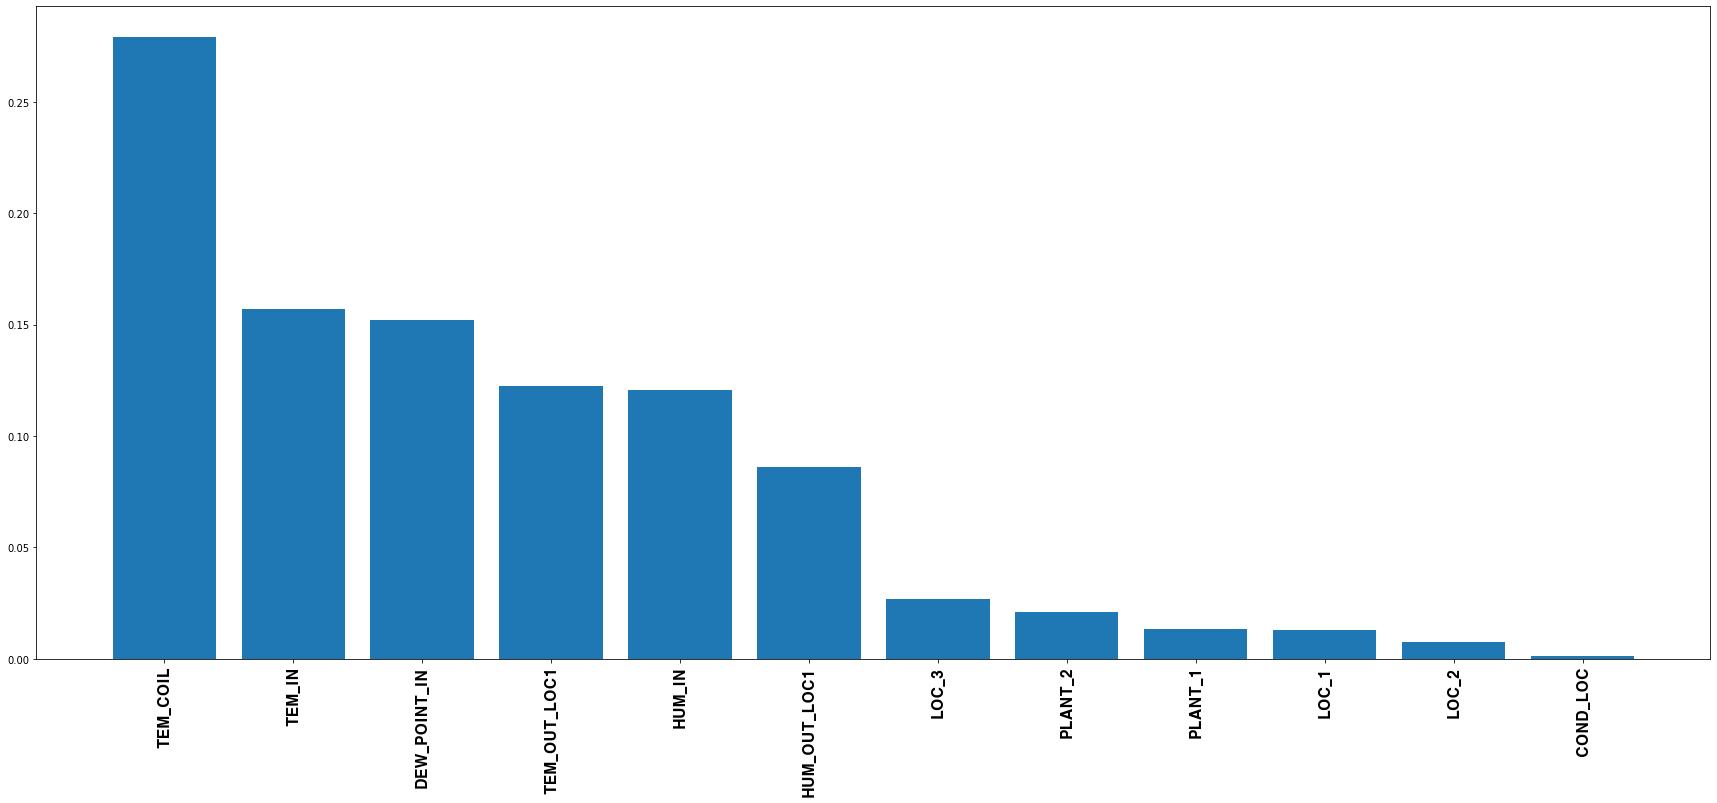

In [458]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf48_df.variable, imp_rf48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## LightGBM

In [459]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [460]:
y_pred24 = lgbm_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104368
         1.0       0.39      0.51      0.44       629

    accuracy                           0.99    104997
   macro avg       0.69      0.75      0.72    104997
weighted avg       0.99      0.99      0.99    104997



In [461]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model48.fit(X_train48, y_train48)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [462]:
y_pred48 = lgbm_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104408
         1.0       0.40      0.28      0.33       589

    accuracy                           0.99    104997
   macro avg       0.70      0.64      0.66    104997
weighted avg       0.99      0.99      0.99    104997



## XGBOOST

In [463]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model24.fit(X_train24, y_train24)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [464]:
y_pred24 = xgb_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104368
         1.0       0.84      0.35      0.50       629

    accuracy                           1.00    104997
   macro avg       0.92      0.68      0.75    104997
weighted avg       1.00      1.00      0.99    104997



In [465]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model48.fit(X_train48, y_train48)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [466]:
y_pred48 = xgb_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104408
         1.0       0.82      0.11      0.19       589

    accuracy                           0.99    104997
   macro avg       0.91      0.56      0.60    104997
weighted avg       0.99      0.99      0.99    104997



## kNN

In [467]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [468]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104368
         1.0       0.79      0.59      0.68       629

    accuracy                           1.00    104997
   macro avg       0.89      0.79      0.84    104997
weighted avg       1.00      1.00      1.00    104997



In [469]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [470]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104408
         1.0       0.62      0.40      0.48       589

    accuracy                           1.00    104997
   macro avg       0.81      0.70      0.74    104997
weighted avg       0.99      1.00      0.99    104997



# Ensemble

## VotingClassifier

In [471]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(
    estimators=[('rf', rf_model24), ('lgbm', lgbm_model24), ('neigh', neigh24)], voting='hard')
voting_model24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [472]:
y_pred24 = voting_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104368
         1.0       0.92      0.52      0.66       629

    accuracy                           1.00    104997
   macro avg       0.96      0.76      0.83    104997
weighted avg       1.00      1.00      1.00    104997



In [473]:
from sklearn.ensemble import VotingClassifier
voting_model48 = VotingClassifier(
    estimators=[('rf', rf_model48), ('lgbm', lgbm_model48), ('neigh', neigh48)], voting='hard')
voting_model48.fit(X_train48, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\B0110\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [474]:
y_pred48 = voting_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104408
         1.0       0.91      0.31      0.46       589

    accuracy                           1.00    104997
   macro avg       0.95      0.65      0.73    104997
weighted avg       1.00      1.00      0.99    104997



##### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 이슬점 추가한 모델 학습

## train, test 데이터 분리

In [475]:
train_Xo = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC', 'DEW_POINT_IN'], axis=1)

In [476]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_Xo, train24_y, test_size=0.3, shuffle=True, random_state=42)

In [477]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_Xo, train48_y, test_size=0.3, shuffle=True, random_state=42)

## Random Forest

In [478]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train24, y_train24)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [479]:
y_pred24 = rf_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104408
         1.0       0.95      0.28      0.43       589

    accuracy                           1.00    104997
   macro avg       0.97      0.64      0.71    104997
weighted avg       1.00      1.00      0.99    104997



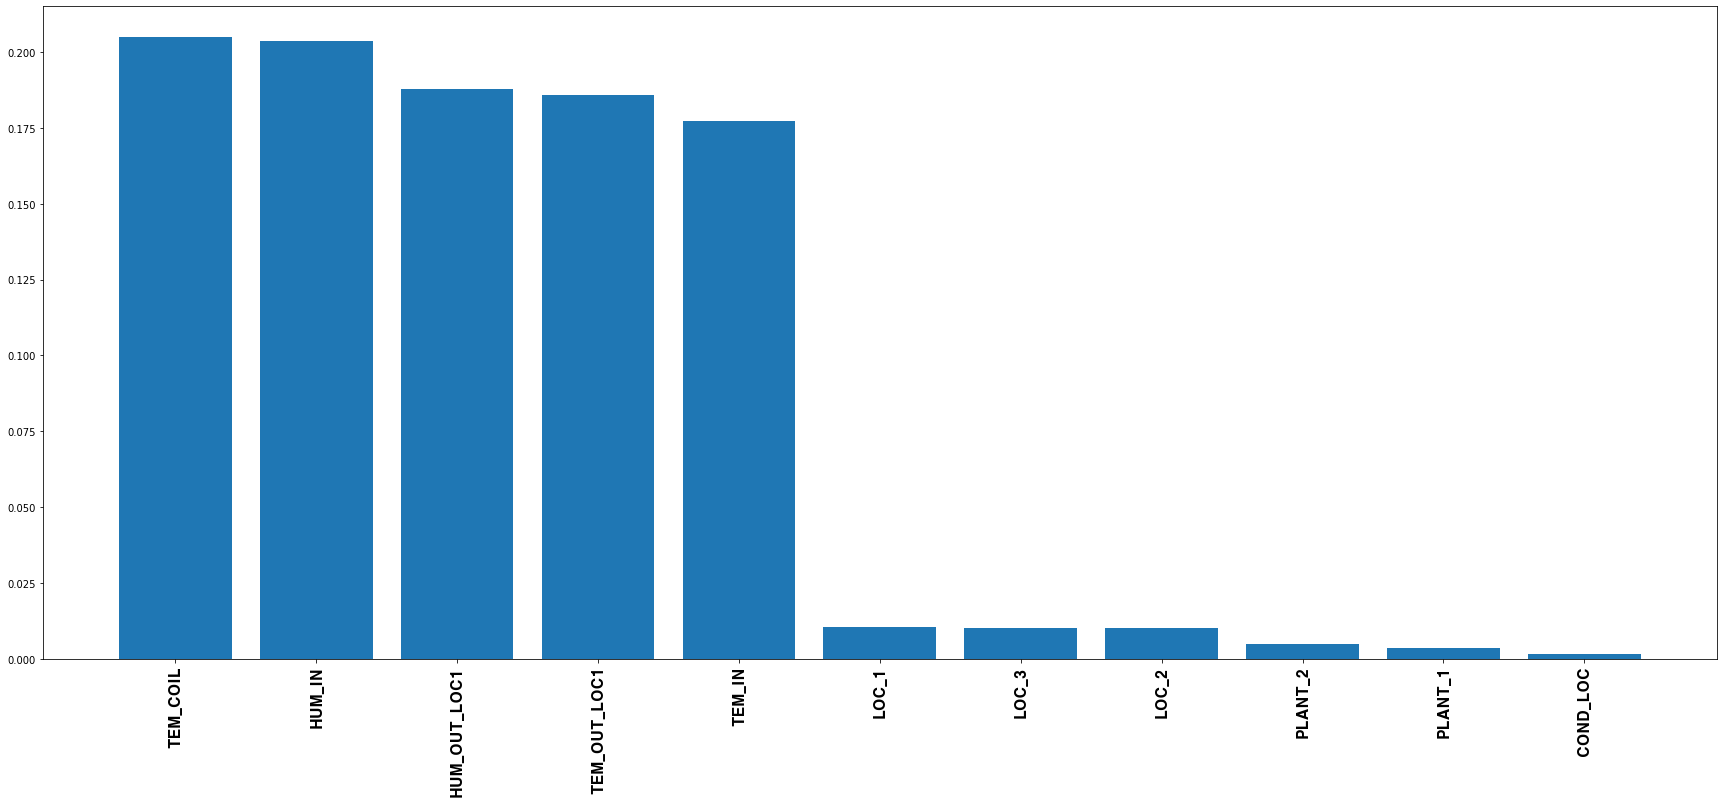

In [480]:
imp_rf24_df = pd.DataFrame(data=np.c_[train_Xo.columns.values, rf_model24.feature_importances_], columns=['variable', 'importance'])
imp_rf24_df.sort_values(by='importance', ascending=False, inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf24_df.variable, imp_rf24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [481]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train48, y_train48)

C:\Users\B0110\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [482]:
y_pred48 = rf_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104408
         1.0       0.94      0.29      0.44       589

    accuracy                           1.00    104997
   macro avg       0.97      0.64      0.72    104997
weighted avg       1.00      1.00      0.99    104997



In [483]:
imp_rf48_df = pd.DataFrame(data=np.c_[train_Xo.columns.values, rf_model48.feature_importances_], columns=['variable', 'importance'])
imp_rf48_df.sort_values(by='importance', ascending=False, inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf48_df.variable, imp_rf48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model24.fit(X_train24, y_train24)

In [ ]:
y_pred24 = lgbm_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

In [ ]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model48.fit(X_train48, y_train48)

In [ ]:
y_pred48 = lgbm_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

## XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model24.fit(X_train24, y_train24)

In [ ]:
y_pred24 = xgb_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

In [ ]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model48.fit(X_train48, y_train48)

In [ ]:
y_pred48 = xgb_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

In [ ]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

In [ ]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(
    estimators=[('rf', rf_model24), ('lgbm', lgbm_model24), ('neigh', neigh24)], voting='hard')
voting_model24.fit(X_train24, y_train24)

In [ ]:
y_pred24 = voting_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_model48 = VotingClassifier(
    estimators=[('rf', rf_model48), ('lgbm', lgbm_model48), ('neigh', neigh48)], voting='hard')
voting_model48.fit(X_train48, y_train48)

In [ ]:
y_pred48 = voting_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))